# COGS 108 Predicting mushroom edibility

https://youtu.be/NyEHiLICmgE

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ x ] YES - make available
* [  ] NO - keep private

# Overview

Here in this project, we are able to sucessfully predict mushroom edibility based on both unsupervised and supervised learning methods. Result suggest that supervised method has better performance, when using a decision tree, we are able to have almost 100% accuracy, suggesting a promising way to predict mushroom edibility.

# Names

- Tianyi Bian
- Xuhui Liu
- Yijing Zhang

<a id='research_question'></a>
# Research Question

Can we use machine learning algorithems to predict the edibility of mushrooms based on their physical attributes? Can we find which physcial attribute contribute the most to the edibility? The physical attributes include shapes, colors, types of cap, gill, stalk and so on.

<a id='background'></a>

## Background & Prior Work

Predicting whether a mushroom is edible is a very interesting and meaningful question. When people are in food shortage or are hiking, mushrooms are an important and delicious food resource. However, some mushrooms are poisonous and very dangerous. We need to figure out a way to find out what mushrooms are edible.


1）K-Means Clustering vs. Logistic Regression
The first project focus on comparing two methods on predicting whether the mushroom is edible. This project is interesting because it compares supervised and unsupervised leaning in the binary prediction case. Besides, since both method is usually used for quantitative data, but the mushroom characters are almost all categorical data, how they address the problem is also very important.

2) Classification (Tensorflow) and Feature Selection
The second project focus on the feature selection, which is an important part of our project. Since there are around 22 columns in our dataset, after we do something like one-hot encoding, the number of columns will continue increase, we need to find out a way to reduce the number of feature and figure out the most important feature. So, we need to find a best way to do feature selection. This project uses Chi-Squared Feature Selection which is interesting. We need to refer to that. 


References (include links):
- 1) https://www.kaggle.com/minc33/k-means-clustering-vs-logistic-regression
- 2) https://www.kaggle.com/jl18pg052/classification-tensorflow-and-feature-selection

# Hypothesis

In our study, we hypothesize that there is indeed a relationship between the poison of the mushroom and its cap color, since there is an old saying that says we cannot eat the colored mushroom since they are all poisonous. Stalk-shape and cap shape can also be important features of mushroom since many hikers and travelers judge whether the mushroom is edible by their shapes. 


# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

We are going to use a dataset called mushroom.csv, which can be found on a Kaggle project. This dataset includes 23 different features about a mushroom, which includes cap-shape, cap-surface, cap-color, and other features. There are a total of 8125 observations in this dataset. These data are stored in a csv file, which is easy for us to import in notebook and analyze with pandas.
link:https://www.kaggle.com/uciml/mushroom-classification

# Setup

In [57]:
import numpy as np
import pandas as pd
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Data Cleaning

## 1. Import the Dataset

In [5]:
# let pandas display max columns
pd.set_option('display.max_columns', None)

In [6]:
# first read the csv and look at it
mushroom_df = pd.read_csv("mushrooms.csv")
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## 2. Feature Interpretation

In [7]:
# We need to understand the meaning of each feature
mushroom_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### Attribute Information: (classes: edible=e, poisonous=p)
Here is a picture of structure of mushroom
<img src="pictures/mushroomglossary.jpg" />
<img src="pictures/mushroom-structure.jpg" />

#### cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
![Mushroom cap shape](pictures/mushroom-cap-shape.jpg)

#### cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
![Mushroom cap surface](pictures/mushroom-cap-surface.jpg)

#### cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
color is encoded by the keys above.

#### bruises: bruises=t,no=f
example of mushroom bruises <br>
![Mushroom bruises](pictures/mushroom-bruise.jpg)

#### odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
odor is encoded by the list above and the features are described.

#### gill-attachment: attached=a,descending=d,free=f,notched=n
![Mushroom gill_attachment](pictures/mushroom-gill-attachment.jpg)

#### gill-spacing: close=c,crowded=w,distant=d
![Mushroom gill_spacing](pictures/mushroom-gill-spacing.jpg)

#### gill-size: broad=b,narrow=n
size of gill is encoded by the keys above.

#### gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
gill color is encoded in a slightly different manner(more colors included) than cap color but the keys are provided.
#### stalk-shape: enlarging=e,tapering=t
![Mushroom stalk_shape](pictures/mushroom-stalk-shape.jpg)

#### stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
![Mushroom stalk_root](pictures/mushroom-stalk-root.jpg)

#### stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
Surface type is illustrated in the former part and the location of the surface above the ring is also illustrated in the second picture

#### stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
Surface type is illustrated in the former part and the location of the surface below the ring is also illustrated in the second picture

#### stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
color is encoded by the keys above.
#### stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
color is encoded by the keys above.
#### veil-type: partial=p,universal=u
![Mushroom veils](pictures/mushroom-veils.jpg)
![Mushroom veils_type](pictures/mushroom-veil-type.jpg)

#### veil-color: brown=n,orange=o,white=w,yellow=y
color is encoded by the keys above.

#### ring-number: none=n,one=o,two=t
color is encoded by the keys above. In our data cleaning step, the ring number are converted to integers.

#### ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
![Mushroom ring_type](pictures/mushroom-ring-type.jpg)

#### spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
![Mushroom spore_print](pictures/mushroom-spore-print.jpg)

#### population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
population describes how the mushrooms are clustered

#### habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
habitat describes where the mushrooms live.

## 3. Data Type of the features

In [8]:
mushroom_df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

They are all string type. Let's determine the type of each varible.

| Varibles | Type |
| --- | --- |
|class |                      binary |
|cap-shape  |                 nominal |
|cap-surface  |             nominal |
|cap-color|                   nominal |
|bruises  |                   binary|
|odor      |                  nominal|
|gill-attachment|             nominal|
|gill-spacing |               nominal|
|gill-size|                   nominal|
|gill-color|                  nominal|
|stalk-shape|                 nominal|
|stalk-root|                  nominal|
|stalk-surface-above-ring|    nominal|
|stalk-surface-below-ring|    nominal|
|stalk-color-above-ring|      nominal|
|stalk-color-below-ring|      nominal|
|veil-type|                   nominal|
|veil-color|                  nominal|
|ring-number|                 ordinal|
|ring-type|                   nominal|
|spore-print-color|           nominal|
|population|                  nominal|
|habitat|                   nominal|

We are fine with nominal data. So, we only need to do binary encoding to _class_ and _bruises_ and do ordinal encoding to _ring-number_.

In [9]:
# We convert poisonous to 0 and edible to 1
mushroom_df["class"] = mushroom_df["class"].replace({"p":0, "e":1})

In [10]:
# We convert bruises to 1 and no bruises to 0
mushroom_df["bruises"] = mushroom_df["bruises"].replace({"f":0, "t":1})

In [11]:
# We ordinal encoding ring number
mushroom_df["ring-number"] = mushroom_df["ring-number"].replace({"n":0, "o":1, "t":2})

In [12]:
# look at the data again
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,1,p,f,c,n,k,e,e,s,s,w,w,p,w,1,p,k,s,u
1,1,x,s,y,1,a,f,c,b,k,e,c,s,s,w,w,p,w,1,p,n,n,g
2,1,b,s,w,1,l,f,c,b,n,e,c,s,s,w,w,p,w,1,p,n,n,m
3,0,x,y,w,1,p,f,c,n,n,e,e,s,s,w,w,p,w,1,p,k,s,u
4,1,x,s,g,0,n,f,w,b,k,t,e,s,s,w,w,p,w,1,e,n,a,g


## 4. Look at Missing value

In [13]:
# Check number of missing value in each column
pd.isnull(mushroom_df).sum(axis = 0)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Good! We don't have any missing value

## 5. Potential problem about the data

We notice that _ring-number_ may be 0. If the mushroom doesn't have a ring, what will be the ring type of the mushroom. Let's look at it. 

In [14]:
mushroom_df[mushroom_df["ring-number"] == 0]["ring-type"].value_counts()

n    36
Name: ring-type, dtype: int64

They are all none, which is very consistent. So, it is not a problem. However, we should still be careful here if we want to develop a regression model because it implies perfect colinearity.

Another possiblely inconsistence in the dataset may be the _stalk-color-above-ring_ and _stalk-color-below-ring_. Let's check whether they are consistent if the _ring-number_ is zero.

In [15]:
df = mushroom_df[mushroom_df["ring-number"] == 0]
(df["stalk-color-above-ring"] == df["stalk-color-below-ring"]).all()

True

In [16]:
df["stalk-color-above-ring"].value_counts()

c    36
Name: stalk-color-above-ring, dtype: int64

We showed that they are consistent, but a key point to notice is that all mushrooms without rings have cinnamon color which is another perfect colinearity.

We do similar test to _stalk-surface-above-ring_ and _stalk-surface-below-ring_.

In [17]:
(df["stalk-surface-above-ring"] == df["stalk-surface-below-ring"]).all()

False

In [18]:
df[["stalk-surface-above-ring", "stalk-surface-below-ring", "ring-number"]].head()

,stalk-surface-above-ring,stalk-surface-below-ring,ring-number
6415,k,y,0
6668,k,y,0
6855,k,y,0
6945,k,y,0
6991,k,y,0


Here is a strange point: why the mushrooms have different surfaces below and above the ring given that the mushrooms do not have a ring. We will try to figure it out in the future.

# Data Analysis & Results (EDA)

In this section, we are mainly going to take a look at every column in the dataframe (i.e., every different feature of the mushroom). Moreover, we are going to observe the relationship between these features and the poisonousness; and the potential relationship between features, to avoid colinearity.

## 1. Basic summary statistics

In [19]:
mushroom_df["class"].value_counts(normalize = True)

1    0.517971
0    0.482029
Name: class, dtype: float64

We observe that the number of poisonous mushrooms and edible mushrooms is about the same

## 2. Contingency Tables

In this section, we are going to establish contingency tables of each feature with the ``class``, and visualize them with barplots. Again, remember that value 1 means edible and value 0 means poisonous.

### (1) cap-shape

<AxesSubplot:xlabel='cap-shape'>

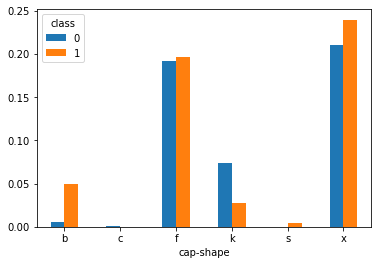

In [20]:
ct_cap_shape = pd.crosstab(mushroom_df['cap-shape'],mushroom_df['class'], margins = False, normalize=True)
ct_cap_shape.plot(kind="bar", rot=0)

From this graph, we can observe that ``flat`` and ``convex`` cap shape behaves relatively indifferent between poison and edible, and ``bell``, ``knobbed`` cap shape behaves relatively significant different between poison and edible. ``conical`` and ``sunken`` have too small sample size that we cannot observe.

We will add this feature to our model. We can do some feature enginearing to retain only three variable in the columns such as bell, knobbed, and not bell nore knobbed.

### (2) cap-surface

<AxesSubplot:xlabel='cap-surface'>

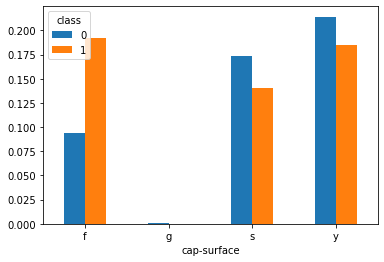

In [21]:
ct_cap_surface = pd.crosstab(mushroom_df['cap-surface'],mushroom_df['class'], margins = False, normalize=True)
ct_cap_surface.plot(kind="bar", rot=0)

From this graph, we can observe that ``fibrous``, ``scaly``, and ``smooth`` cap surface behaves relatively significant between poison and edible. ``grooves`` have too small sample size that we cannot observe.

We will add this feature to our model. We can do feature engineering like fibrous or not.

### (3) cap-color

As the old saying says, don't eat colorful mushrooms. lets see how mushrooms are seperated by color.

<AxesSubplot:xlabel='cap-color'>

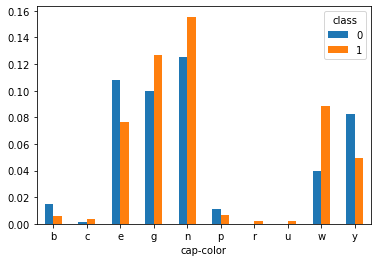

In [22]:
ct_cap_color = pd.crosstab(mushroom_df['cap-color'],mushroom_df['class'], margins = False, normalize=True)
ct_cap_color.plot(kind="bar", rot=0)

From this graph, we can observe that ``buff``, ``red``, ``gray``,``brown``, ``pink``, ``white``, and ``yellow`` cap color behaves relatively significant between poison and edible. ``cinnamon``, ``green``, and ``purple`` have too small sample size that we cannot observe.

We will add this feature to our model.

### (4) bruises

<AxesSubplot:xlabel='bruises'>

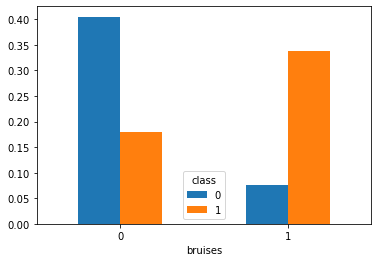

In [23]:
ct_bruises = pd.crosstab(mushroom_df['bruises'],mushroom_df['class'], margins = False, normalize=True)
ct_bruises.plot(kind="bar", rot=0)

From this graph, we can observe that there is significant difference between poison and edible on whether mushrooms has bruises.

We will add this feature to our model.

### (5) odor

<AxesSubplot:xlabel='odor'>

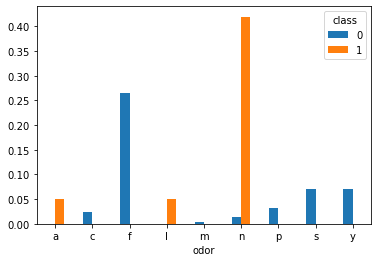

In [24]:
ct_odor = pd.crosstab(mushroom_df['odor'],mushroom_df['class'], margins = False, normalize=True)
ct_odor.plot(kind="bar", rot=0)

From this graph, we can observe that all categories in mushroom odors behaves relatively significant between poison and edible.

We will add this feature to our model.

### (6) gill-attachment

<AxesSubplot:xlabel='gill-attachment'>

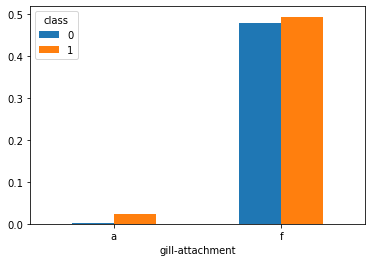

In [25]:
ct_gill_attachment = pd.crosstab(mushroom_df['gill-attachment'],mushroom_df['class'], margins = False, normalize=True)
ct_gill_attachment.plot(kind="bar", rot=0)

From this graph, we can observe that all categories in gill-attachment behaves relatively indifferent between poison and edible.

We will **NOT** add this feature to our model.

### (7) gill-spacing

<AxesSubplot:xlabel='gill-spacing'>

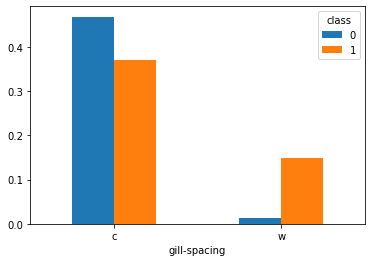

In [26]:
ct_gill_spacing = pd.crosstab(mushroom_df['gill-spacing'],mushroom_df['class'], margins = False, normalize=True)
ct_gill_spacing.plot(kind="bar", rot=0)

From this graph, we can observe that all categories in gill-spacing behaves relatively significant between poison and edible.

We will add this feature to our model.

### (8) gill-size

<AxesSubplot:xlabel='gill-size'>

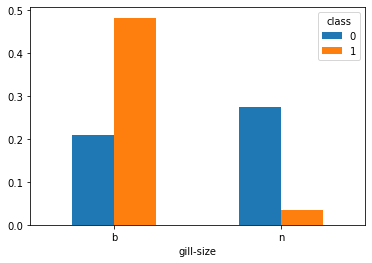

In [27]:
ct_gill_size = pd.crosstab(mushroom_df['gill-size'],mushroom_df['class'], margins = False, normalize=True)
ct_gill_size.plot(kind="bar", rot=0)

From this graph, we can observe that all categories in gill-size behaves relatively significant between poison and edible.

We will add this feature to our model.

### (9) gill-color

<AxesSubplot:xlabel='gill-color'>

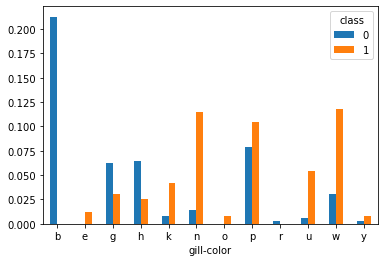

In [28]:
ct_gill_color = pd.crosstab(mushroom_df['gill-color'],mushroom_df['class'], margins = False, normalize=True)
ct_gill_color.plot(kind="bar", rot=0)

From this graph, we can observe that all categories in gill-color behaves relatively significant between poison and edible.

We will add this feature to our model.

### (10) stalk-shape

<AxesSubplot:xlabel='stalk-shape'>

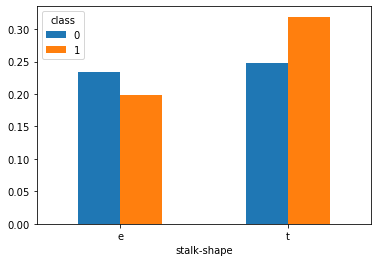

In [29]:
ct_stalk_shape = pd.crosstab(mushroom_df['stalk-shape'],mushroom_df['class'], margins = False, normalize=True)
ct_stalk_shape.plot(kind="bar", rot=0)

From this graph, we can observe that all categories in stalk-shape behaves relatively indifferent between poison and edible.

We will **NOT** add this feature to our model.

### (11) stalk-root

<AxesSubplot:xlabel='stalk-root'>

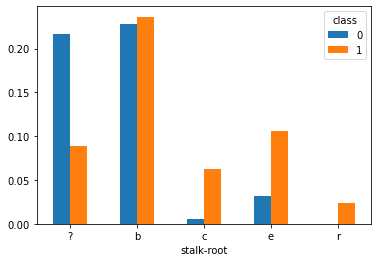

In [30]:
ct_stalk_root = pd.crosstab(mushroom_df['stalk-root'],mushroom_df['class'], margins = False, normalize=True)
ct_stalk_root.plot(kind="bar", rot=0)

From this graph, we can observe that except ``bulbous``, which is relatively indifferent between poison and edible, all other categories in stalk-root behaves relatively indifferent between poison and edible.

We will add this feature to our model.

### (12) stalk-surface-above-ring

<AxesSubplot:xlabel='stalk-surface-above-ring'>

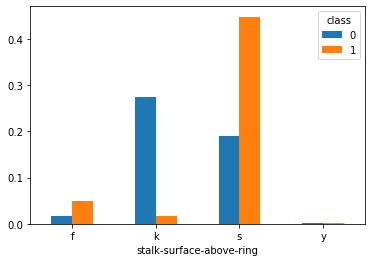

In [31]:
ct_stalk_sar = pd.crosstab(mushroom_df['stalk-surface-above-ring'],mushroom_df['class'], margins = False, normalize=True)
ct_stalk_sar.plot(kind="bar", rot=0)

From this graph, we can observe that except ``scaly``, which has too small sample size to follow, all other categories in stalk-surface-above-ring behaves relatively indifferent between poison and edible.

We will add this feature to our model.

### (13) stalk-surface-below-ring

<AxesSubplot:xlabel='stalk-surface-below-ring'>

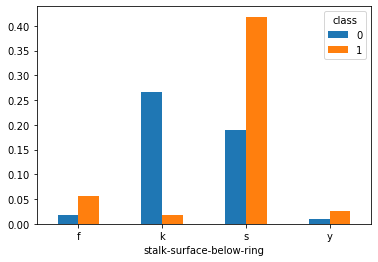

In [32]:
ct_stalk_sbr = pd.crosstab(mushroom_df['stalk-surface-below-ring'],mushroom_df['class'], margins = False, normalize=True)
ct_stalk_sbr.plot(kind="bar", rot=0)

From this graph, we can observe that all categories in stalk-surface-below-ring behaves relatively significant between poison and edible.

We will add this feature to our model.

### (14) stalk-color-above-ring

<AxesSubplot:xlabel='stalk-color-above-ring'>

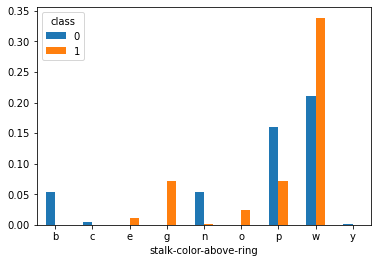

In [33]:
ct_stalk_car = pd.crosstab(mushroom_df['stalk-color-above-ring'],mushroom_df['class'], margins = False, normalize=True)
ct_stalk_car.plot(kind="bar", rot=0)

From this graph, we can observe that except ``cinnamon``, which has too small sample size to follow, all other categories in stalk-color-above-ring behaves relatively indifferent between poison and edible.

We will add this feature to our model.

### (15) stalk-color-below-ring

<AxesSubplot:xlabel='stalk-color-below-ring'>

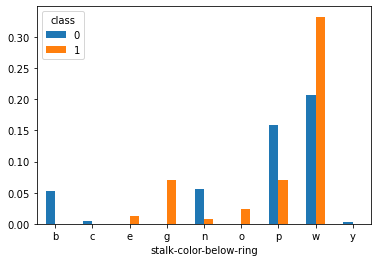

In [34]:
ct_stalk_cbr = pd.crosstab(mushroom_df['stalk-color-below-ring'],mushroom_df['class'], margins = False, normalize=True)
ct_stalk_cbr.plot(kind="bar", rot=0)

From this graph, we can observe that except ``cinnamon``, which has too small sample size to follow, all other categories in stalk-color-above-ring behaves relatively indifferent between poison and edible.

We will add this feature to our model.

***Remark***

We have noticed that the graph of contingency table of ``stalk-color-above-ring`` and ``stalk-color-below-ring`` are exactly the same. So we are going to check their colinearity in the next section.

In [35]:
mushroom_df[['stalk-color-below-ring', 'stalk-color-above-ring']]

,stalk-color-below-ring,stalk-color-above-ring
0,w,w
1,w,w
2,w,w
3,w,w
4,w,w
...,...,...
8119,o,o
8120,o,o
8121,o,o
8122,w,w


### (16) veil-type

<AxesSubplot:xlabel='veil-type'>

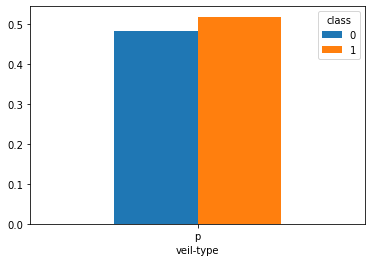

In [36]:
ct_veil_type = pd.crosstab(mushroom_df['veil-type'],mushroom_df['class'], margins = False, normalize=True)
ct_veil_type.plot(kind="bar", rot=0)

In [37]:
mushroom_df[mushroom_df['veil-type'] != 'p']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


We have realized that there is only one category in ``veil-type``. Therefore, we will **NOT** add this feature to model.

### (17) veil-color

<AxesSubplot:xlabel='veil-color'>

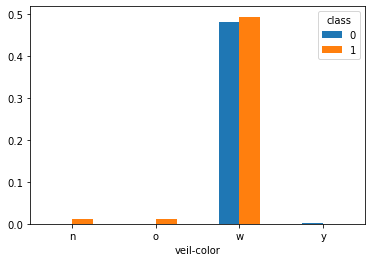

In [38]:
ct_veil_type = pd.crosstab(mushroom_df['veil-color'],mushroom_df['class'], margins = False, normalize=True)
ct_veil_type.plot(kind="bar", rot=0)

From this graph, we have noticed that ``brown``, ``orange``, and ``yellow`` have too small sample size to follow, and ``white`` is relatively indifferent between poison and edible.

We will **NOT** add this feature to model.

### (18) ring-number

<AxesSubplot:xlabel='ring-number'>

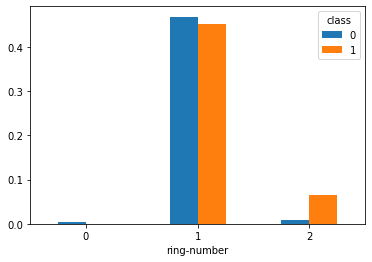

In [39]:
ct_ring_number = pd.crosstab(mushroom_df['ring-number'],mushroom_df['class'], margins = False, normalize=True)
ct_ring_number.plot(kind="bar", rot=0)

From this graph, we have noticed that ``0``, ``2`` have too small sample size to follow, and ``1`` is relatively indifferent between poison and edible.

We will **NOT** add this feature to model.

### (19) ring-type

<AxesSubplot:xlabel='ring-type'>

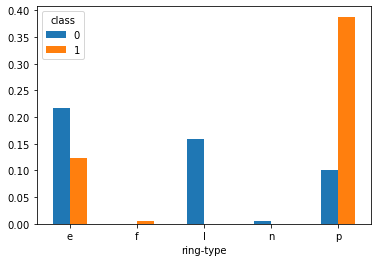

In [40]:
ct_ring_type = pd.crosstab(mushroom_df['ring-type'],mushroom_df['class'], margins = False, normalize=True)
ct_ring_type.plot(kind="bar", rot=0)

From this graph, we can observe that except ``flaring`` and ``none``, which has too small sample size to follow, all other categories in spore-print-color behaves relatively indifferent between poison and edible.

We will add this feature to our model.

### (20) spore-print-color

<AxesSubplot:xlabel='spore-print-color'>

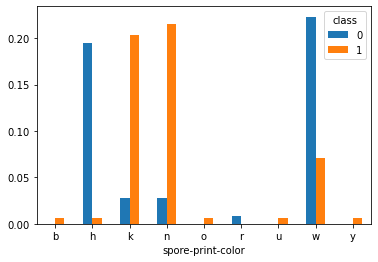

In [41]:
ct_spc = pd.crosstab(mushroom_df['spore-print-color'],mushroom_df['class'], margins = False, normalize=True)
ct_spc.plot(kind="bar", rot=0)

From this graph, we can observe that except ``buff``, ``orange``, ``green``, ``purple``, and ``yellow``, which has too small sample size to follow, all other categories in spore-print-color behaves relatively indifferent between poison and edible.

We will add this feature to our model.

### (21) population

<AxesSubplot:xlabel='population'>

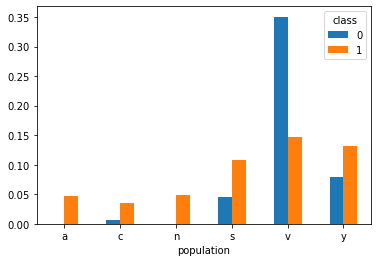

In [42]:
ct_population = pd.crosstab(mushroom_df['population'],mushroom_df['class'], margins = False, normalize=True)
ct_population.plot(kind="bar", rot=0)

From this graph, we can observe that all categories in ``population`` behaves relatively significant between poison and edible.


We will add this feature to our model.

### (22) habitat

<AxesSubplot:xlabel='habitat'>

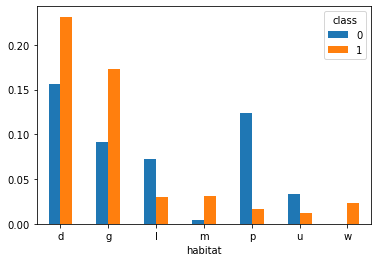

In [43]:
ct_habitat = pd.crosstab(mushroom_df['habitat'],mushroom_df['class'], margins = False, normalize=True)
ct_habitat.plot(kind="bar", rot=0)

From this graph, we can observe that all categories in ``habitat`` behaves relatively significant between poison and edible.


We will add this feature to our model.

### (23) Summary of included features

After viewing the contingency tables, we are going to choose the listed features:
- cap-shape
- cap-surface
- cap-color
- bruises
- odor
- gill-spacing
- gill-size
- gill-color
- stalk-root
- stalk-surface-above-ring
- stalk-surface-below-ring
- stalk-color-above-ring
- stalk-color-below-ring
- ring-type
- spore-print-color
- population
- habitat 

## 2. Possible Colinearity

In [44]:
# collect useful features
mushroom_df_feature_reduced1 = mushroom_df[["cap-shape", "cap-surface", "cap-color", "bruises", "odor",
                                            "gill-spacing", "gill-size", "gill-color", "stalk-root",
                                            "stalk-surface-above-ring", "stalk-surface-below-ring",
                                            "stalk-color-above-ring", "stalk-color-below-ring",
                                            "ring-type", "spore-print-color", "population", "habitat"]]

In [45]:
col_lst = list(mushroom_df_feature_reduced1.columns)

We use chi-square test for independence to calculate the chi-square statistics for any pair of variables.

In [46]:
out_array = np.zeros(shape=(len(col_lst),len(col_lst)))
for i in range(len(col_lst)):
    for j in range(len(col_lst)):
        test_df = pd.crosstab(index=mushroom_df[col_lst[i]], columns=mushroom_df[col_lst[j]])
        stat = chi2_contingency(test_df)[0]
        out_array[i][j] = stat

In [47]:
dependent_matrix = pd.DataFrame(out_array)

In [48]:
dependent_matrix.index = col_lst
dependent_matrix.columns = col_lst

The results are showed in the following table

In [49]:
dependent_matrix

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
cap-shape,40620.000000,1011.493003,1193.768578,530.776681,2448.503052,54.229876,977.206565,2245.151613,4215.114824,624.355608,307.051665,1871.870085,1179.404895,1408.359529,2558.981366,2364.712278,2985.912206
cap-surface,1011.493003,24372.000000,1236.828958,146.695811,1385.708498,929.337926,625.211042,1617.494297,2412.976732,506.230074,699.333029,1553.528443,1615.400201,1230.827400,1318.851622,1674.019157,1535.547169
cap-color,1193.768578,1236.828958,73116.000000,384.838070,7164.821147,1299.555299,1796.936323,5832.239102,4824.721663,1610.732543,2497.777181,4970.170076,5068.393964,10120.742122,5335.212074,3798.735391,5205.101254
bruises,530.776681,146.695811,384.838070,8119.883087,3548.535179,726.942784,1108.124760,3435.836879,2650.937973,2687.718334,2609.306376,1897.013460,1973.232800,4797.865583,3046.673704,733.968760,2289.963040
odor,2448.503052,1385.708498,7164.821147,3548.535179,64992.000000,1500.504960,4703.776083,9898.449462,12481.423734,4224.863722,6271.550490,13172.786758,12967.365435,15782.980493,10211.837811,5709.118137,6675.138401
gill-spacing,54.229876,929.337926,1299.555299,726.942784,1500.504960,8116.617004,94.707626,862.090827,2692.401910,1553.330059,1398.279336,1307.336699,1145.527552,684.708672,773.675909,3689.974478,2391.899057
gill-size,977.206565,625.211042,1796.936323,1108.124760,4703.776083,94.707626,8119.318986,4994.285659,3199.673357,234.949704,185.031607,1088.724300,979.175259,2645.539640,3546.112224,2178.283023,2025.525172
gill-color,2245.151613,1617.494297,5832.239102,3435.836879,9898.449462,862.090827,4994.285659,89364.000000,8627.256386,3051.832348,3481.993923,11516.419368,11306.083821,8737.084007,15303.012180,7336.259763,10248.056738
stalk-root,4215.114824,2412.976732,4824.721663,2650.937973,12481.423734,2692.401910,3199.673357,8627.256386,32496.000000,2314.813133,7546.866580,4438.484003,4441.619525,6369.280188,8772.219784,9117.233546,9361.864103
stalk-surface-above-ring,624.355608,506.230074,1610.732543,2687.718334,4224.863722,1553.330059,234.949704,3051.832348,2314.813133,24372.000000,5850.201063,6507.249697,4568.798015,5032.931820,4281.006272,2459.438479,2201.623623


We visualize the result. The effect is similar to the correlation matrix. The brighter color means more dependency.

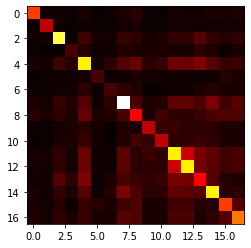

In [47]:
plt.imshow(dependent_matrix, cmap='hot', interpolation='nearest')
plt.show()

We will pay attention to those pair of vairables with high dependency.

# Prediction Model

## 1. Unsupervised learning

We will look at the natural clusters generated by unsupervised learning algorithm in this section. We will compare these clusters with edibility of these mushrooms.

### 1.1 K-mode Algorithm

We will implement a K-mode algorithm in this section. We set K = 2.

In [50]:
y = mushroom_df["class"]

In [51]:
X = mushroom_df_feature_reduced1

In [112]:
inits = X.sample(2) # Generate the random initialization

In [51]:
def calculate_rank(matrix, centers):
    
    disimilarity_score_lst_0 = []
    disimilarity_score_lst_1 = []
    
    for i in range(matrix.shape[0]):
        disimilarity_score_lst_0.append((matrix.iloc[i, :] != centers.iloc[0,:]).sum())
        disimilarity_score_lst_1.append((matrix.iloc[i, :] != centers.iloc[1,:]).sum())
    
    disimilarity_matrix = pd.DataFrame({"disimilarity_score_0":disimilarity_score_lst_0, "disimilarity_score_1":disimilarity_score_lst_1})
    
    rank = disimilarity_matrix.idxmin(axis = 1)
    
    return rank

In [52]:
def calculate_centers(matrix, rank):
    
    matrix_with_rank = matrix.assign(rank = rank)
    
    centers = matrix_with_rank.groupby("rank").aggregate(lambda x: x.value_counts().index[0])
    
    return centers

In [113]:
tracker = 0
centers = inits
while True:
    rank = calculate_rank(X, centers)
    new_centers = calculate_centers(X, rank)
    if ((centers.iloc[0, :] != new_centers.iloc[0, :]).sum()<=0) and ((centers.iloc[1, :] != new_centers.iloc[1, :]).sum()<=0):
        break
    else:
        centers = new_centers
    tracker = tracker + 1
    print(tracker)

1
2
3
4


In [114]:
y_predict = rank.replace({"disimilarity_score_0":0, "disimilarity_score_1":1})

In [116]:
(y == y_predict).mean()

0.8911866075824717

In [119]:
cm = confusion_matrix(y, y_predict)

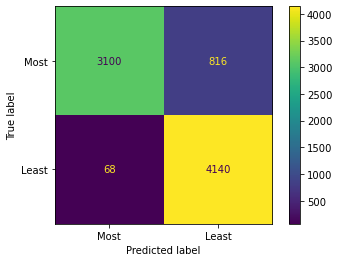

In [121]:
disp = ConfusionMatrixDisplay(cm, ["Most", "Least"])
disp.plot()

In [124]:
tn, fp, fn, tp =  cm.ravel()
(tn, fp, fn, tp)

(3100, 816, 68, 4140)

## 2. Supervised learning

### 2.1 Decision Tree

In [182]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,x,s,n,1,p,c,n,k,e,s,s,w,w,p,k,s,u
1,x,s,y,1,a,c,b,k,c,s,s,w,w,p,n,n,g
2,b,s,w,1,l,c,b,n,c,s,s,w,w,p,n,n,m
3,x,y,w,1,p,c,n,n,e,s,s,w,w,p,k,s,u
4,x,s,g,0,n,w,b,k,e,s,s,w,w,e,n,a,g


In [54]:
# We will use one-hot encoding to convert all the categorical variables to dummy variables
ohe = OneHotEncoder()
# drop first to avoid perfect colinearity
OneHotEncoder(drop='first')
ohe.fit(X)
out = ohe.transform(X).toarray()

In [137]:
# We convert 17 features to 105 dummy variables which is reasonable
out.shape

(8124, 105)

In [174]:
# Here, we use train test split, with test set size to be 0.2
X_train, X_test, y_train, y_test = train_test_split(out, y, test_size=0.2, random_state=94)

In [175]:
clf = DecisionTreeClassifier(random_state=94)

In [176]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=94)

In [177]:
# predict training set
y_train_predict = clf.predict(X_train)

In [178]:
# predict test set
y_test_predict = clf.predict(X_test)

In [179]:
# training set accuracy is 100%
(y_train_predict == y_train).mean()

1.0

In [180]:
# test set accuracy is 100%. So, there is no sign of overfit
(y_test_predict == y_test).mean()

1.0

### 2.2 Random Forest 

The Decision Tree Classifier reaches a perfect accuracy in predicting mushroom edibility.

In [52]:
# Check for the features
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,x,s,n,1,p,c,n,k,e,s,s,w,w,p,k,s,u
1,x,s,y,1,a,c,b,k,c,s,s,w,w,p,n,n,g
2,b,s,w,1,l,c,b,n,c,s,s,w,w,p,n,n,m
3,x,y,w,1,p,c,n,n,e,s,s,w,w,p,k,s,u
4,x,s,g,0,n,w,b,k,e,s,s,w,w,e,n,a,g


In [55]:
# Train-test split: with test size to be 0.25
X_train, X_test, y_train, y_test = train_test_split(out, y, test_size=0.25, random_state=30)

In [59]:
# Training the machine learning model using random forest
# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators = 100, bootstrap = True)

# Fit on training data
model_mushroom = clf.fit(X_train, y_train)

In [60]:
# Report the accuracy score
print('Correct Prediction (%) for mushrooms:', 
      accuracy_score(y_test, model_mushroom.predict(X_test), normalize=True)*100.0)

Correct Prediction (%) for mushrooms: 100.0


In [61]:
# Run the code to view the classification report metrics

report = classification_report(y_test, model_mushroom.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       933
           1       1.00      1.00      1.00      1098

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



From our accuracy score and the classification report, we can see that the Random Forest model also achieves a perfect accuracy (100%) in predicting mushroom accuracy.

We thought this might be a conincidence of reaching a 100% accuracy. Therefore, we changed the number of trees in forest in the RandomForestClassification Model and try again with this model.

In [62]:
# Training the machine learning model using random forest
# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators = 50, bootstrap = True)

# Fit on training data
model_mushroom = clf.fit(X_train, y_train)

In [ ]:
# Report the accuracy score
print('Correct Prediction (%) for mushrooms with 50 trees:', 
      accuracy_score(y_test, model_mushroom.predict(X_test), normalize=True)*100.0)

In [63]:
# Run the code to view the classification report metrics

report = classification_report(y_test, model_mushroom.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       933
           1       1.00      1.00      1.00      1098

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



The result is still 100% accuracy. Therefore, we can confidently say the Random Forest model also achieves a perfect accuracy in predicting mushroom accuracy.

# Ethics & Privacy

First of all, this model might have some unintended consequences. For example, knowing that this model can provide extra information on the edibility of the mushrooms. One might choose to eat mushroom when there is absolutely no need for him to take the mushroom.(e.g. When one has enough food but just want one more course on his dinner table). Considering that even our prediction shows 100% accurate rate for our test set, the modle can still be wrong if new types of mushrooms are found. Moreover, our k mode classifying model have more false positive prediction on the edibility which this prediction might increase health risk by misidendifying a poisonous mushroom as edible. Moreover, some mushroom feature might not be very distinct for non-specialist to recognize.( For example a spicy smell might be misunderstanded as a pungent smell.And our model havely relays on such feature to make predcitions.) Therefore our prediction might fail to cover all people. Since our project focus on the study of mushrooms instead of on objects that are more related to people, its quite unlikely for personal information to leak. However, it is still possible to make inferences about personal information based on where poisonous mushrooms are located.

# Conclusion & Discussion

Results
In our project, we are able to first explore the data and find some interesting knowledge about mushroom edibility. For example, we can see that based on the contingency graph, mushroom odor, gill color and bruises are all strong predictors for mushroom edibility. For example, from this dataset, all mushroom that has a buff gill color are poisonous. Based on these strong associations we found in our dataset, we are able to exclude some features out of our prediction model. We also to found internal correlation between different mushroom features, for example ring type might be correlated to odor, which is very interesting and might inspire some evolutionary biology research on why these two intuitively unrelated features are correlated. We then generate prediction models based on both unsupervised/supervised learning method. We are able to see that supervised learning method has a better performance than the unsupervised learning method, and in this prediction, both a decision tree and a random forest approach can achieve 100% prediction accuracy, which serves as a very competent model in predicting mushroom edibility.
Discussion
Although we are able to achieve perfect accuracy in our prediction model, there is still few considerations we need to think about. For example, there is over 10000 types of mushrooms in the world and our data set only includes about 8000 which is only half of them. So there is still possibility that our prediction model might fail to include some important features for the other 5000 mushrooms that are not in our dataset. Moreover, currently our model uses 17 features for the prediction, however if we think practically, one is nearly impossible to correctly identify all the 17 features. Therefore, we might need to introduce some error prone feature to our model as well as trying to further reduce the features that is needed for the model such that we are able to still make correct prediction but with fewer number of features needed.


# Team Contributions

Xuhui liu: decision tree coding, data cleaning, data finding, feature explination.
Yijing Zhang:random Forest coding, generating contigency table, research hypothesis write up
Tianyi Bian: Compling all code, conclusion & discussion, and video presentation.